<a href="https://colab.research.google.com/github/JCDster/IntroToMachineLearning/blob/main/assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [5]:
! git clone https://www.github.com/DS3001/assignment3

Cloning into 'assignment3'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 10
Receiving objects: 100% (14/14), 872.93 KiB | 13.03 MiB/s, done.
Resolving deltas: 100% (1/1), done.


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.

2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [33]:
#1
import pandas as pd
car_df = pd.read_csv("./assignment3/data/car_data.csv")
car_df.info()
car_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [34]:
#2
car_df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [35]:
car_df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
car_df["G"] = 1
car_df.loc[car_df["Gender"] == "Male", "G"] = 0
car_df["G"].unique()

array([0, 1])

In [37]:
X_vars = ['AnnualSalary','Age']
x = car_df.loc[:,X_vars]
y = car_df['Purchased']

In [38]:
#3
def maxminfunc(X):
  X = (X-min(X))/(max(X)-min(X))
  return X


x = x.apply(maxminfunc)
x.describe()

,AnnualSalary,Age
count,1000.000000,1000.000000
mean,0.419556,0.491244
std,0.250824,0.237935
min,0.000000,0.000000
25%,0.228182,0.311111
50%,0.414545,0.488889
75%,0.545455,0.666667
max,1.000000,1.000000


In [39]:
#4
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=1)

[ 6 16]


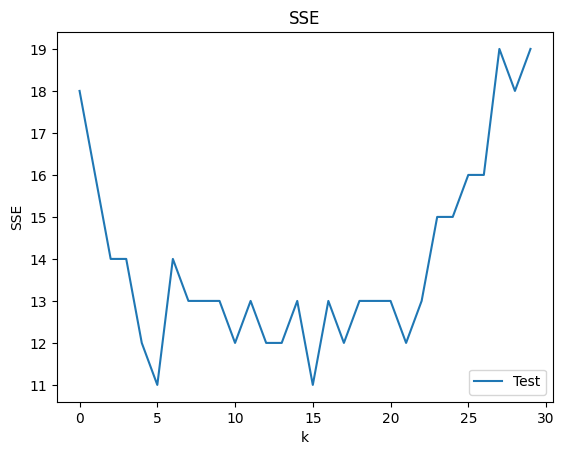

In [40]:
#5
#You're code but commented by me
import numpy as np
import matplotlib.pyplot as plt #import plt for the graph later on
from sklearn.neighbors import KNeighborsClassifier #importKNeighbors to make our sk model

# Find the best k 1-30
k_bar = 30
k_grid = np.arange(1,k_bar) # Get the range of k's we what to consider
SSE = np.zeros(k_bar) # A object to save the SSE of each K
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
  fitted_model = model.fit(x_train,y_train) # Train the model based on the training data
  y_hat = fitted_model.predict(x_test) # Use the fitted model to try and predict eah test value
  SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
SSE_min = np.min(SSE) # find the lowest SSE
min_index = np.where(SSE==SSE_min) # Find which index of k_grid this occures at
k_star = k_grid[min_index] # get that value of k
print(k_star) #print that value

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE vs the k value
plt.xlabel("k") #add labels
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

Optimal k is either 6 or 16, I'll use 6.

In [41]:
#6
#again you're code but I comment
model = KNeighborsClassifier(n_neighbors=6) # Create a sk model based on the k achieved in #5
fitted_model = model.fit(x_train,y_train) # Fit it with the data again
y_hat = fitted_model.predict(x_test) # predict our test value
pd.crosstab(y_test, y_hat) #compare the predicted vs actual


col_0,0,1
Purchased,,
0,120,5
1,6,69


This model does a good job at predicting whether or not there will be a purches. Out of 126 it predicted to not be purchesed only 6 were off and out of 74 it predicted to be a purches only 5 were off. Overall accuracy is 189/200 or 94.5%.

In [45]:
#7
#you're code as commented by yours truely
from sklearn.model_selection import train_test_split
#seperate the important values for predicting and testing
vars = ['Age','AnnualSalary','Gender'] #prediction vars
X = car_df.loc[:,vars] #X = the prediction vars
y = car_df['Purchased'] #For testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1) #Split them up

#Fit a model based on the genders
model = KNeighborsClassifier(n_neighbors=6) # Create a sk model for k = 6
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train) # Train it without taking into account gender
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1)) # Predict based on training data, again dropping gender
#Find the predicted data and the actual data to plot later
y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']

In [46]:
pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,59,3
1,14,33


In [47]:
pd.crosstab(y_M, y_hat_M)

col_0,0,1
Purchased,,
0,61,2
1,11,17


For females the program gets 17/109 or 15.6% wrong and for males it gets 13/91 or 14.2%. The program using k=6 has roughly equal accuracy for both groups. It's midly (1.4%) worse with females, but this is very low. This mean that the program is very fare and is able to compute each sex equally. However it does underestimate how often both sex will purchess.

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [6]:
import pandas as pd
USA_car = pd.read_csv("./assignment3/data/USA_cars_datasets.csv")

USA_car = USA_car[["price", 'year', 'mileage']]

USA_car.info()
USA_car.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    2499 non-null   int64
 1   year     2499 non-null   int64
 2   mileage  2499 non-null   int64
dtypes: int64(3)
memory usage: 58.7 KB


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


all non-null according to the info

In [7]:
USA_car.describe()


,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [8]:
X_vars = ['year', 'mileage']
x = USA_car.loc[:,X_vars]
y = USA_car['price']

In [9]:
#2
def maxminfunc(X):
  X = (X-min(X))/(max(X)-min(X))
  return X


x = x.apply(maxminfunc)
x.describe()


,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


In [10]:
#3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=1)

In [26]:
#4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # Import the kNN classifier tool

# Determine the optimal k:
k_set = [3, 10, 25, 50, 100, 300]
k_bar = 6
count = 0;
SSE = np.zeros(k_bar) # Object to save the Sum of Squared Error
hat_collector = {}
for k in k_set:
  model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
  fitted_model = model.fit(x_train,y_train) # Train the model on our data
  y_hat = fitted_model.predict(x_test) # Predict values for test set
  hat_collector[count] = y_hat
  SSE[count] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
  count += 1
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
for i in min_index:
  print(k_set[int(i)])


300


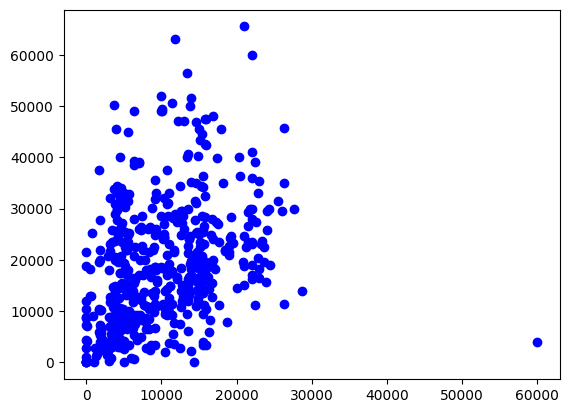

In [19]:
plt.scatter(hat_collector[0], y_test, c ="blue") #k=3

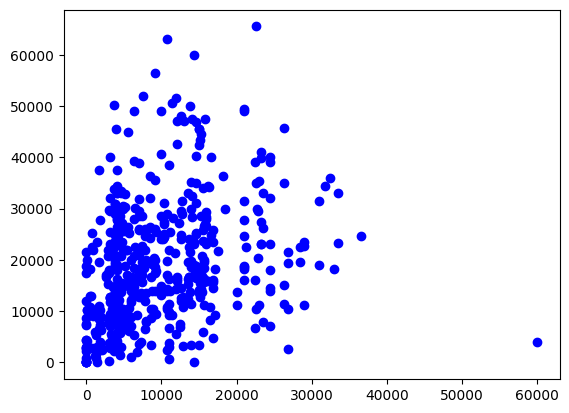

In [20]:
plt.scatter(hat_collector[1], y_test, c ="blue") #k=10

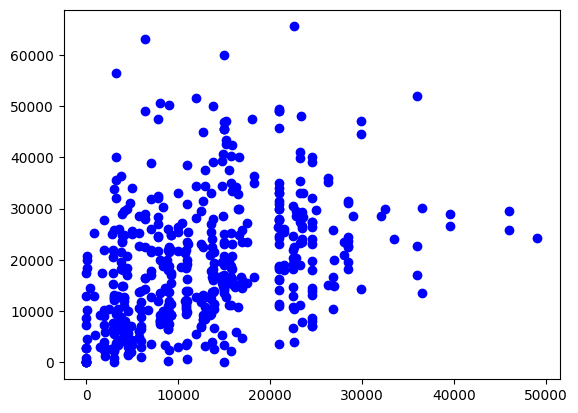

In [22]:
plt.scatter(hat_collector[2], y_test, c ="blue") #k=25

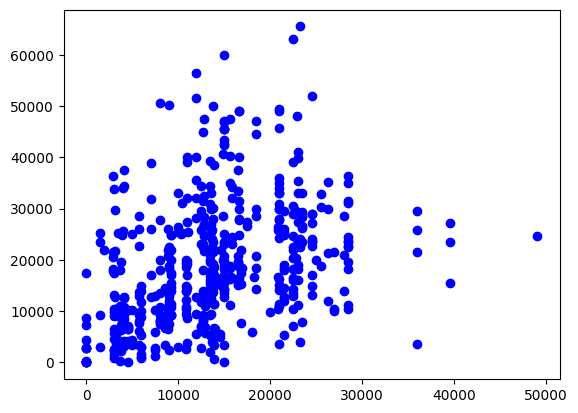

In [23]:
plt.scatter(hat_collector[3], y_test, c ="blue") #k=50

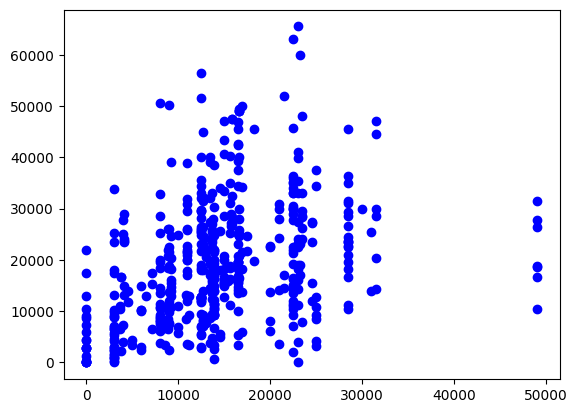

In [24]:
plt.scatter(hat_collector[4], y_test, c ="blue") #k=100

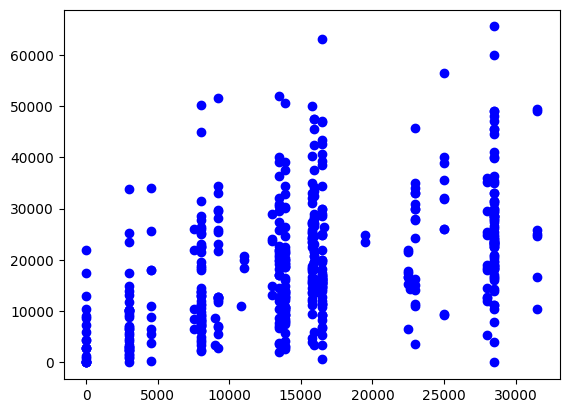

In [25]:
plt.scatter(hat_collector[5], y_test, c ="blue") #k=300

With k getting greater and greater, the predictions become more orginized and more spread out over the x axis. When k=3 there was bassically just one big cluster with one outlire, but as k grew there begane to be more and more different groupings in the scatterplots.

[554]


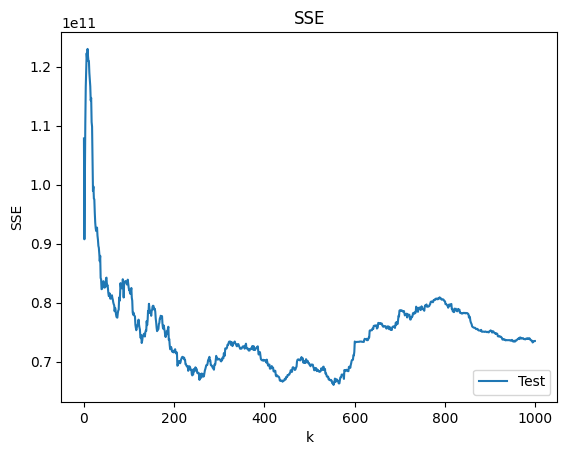

In [30]:
from numpy.core.multiarray import ndarray
#5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # Import the kNN classifier tool

# Determine the optimal k:
k_bar = 1000
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) # Object to save the Sum of Squared Error
for_a_plot = ndarray
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
  fitted_model = model.fit(x_train,y_train) # Train the model on our data
  y_hat = fitted_model.predict(x_test) # Predict values for test set
  if k == 800:
    for_a_plot = y_hat
  SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

The optimal k is 554 (assumming the optimal k < 1000)

#6
As k varied, the ammount of clusters either overfit or underfit the data. When k was too small, it underfit the data. The program was not looking for enough clusters to accuratly represent the data, leading to predictions grouping unlike data. This makes the resulting predictions skewed. Oppositly, if the program looks for more clusters than exists, it will break up actual clusters of data into multiple clusters, losing the meaning of the clusters and theirfor skewing the results. An example of this overfitting is shown below when k=800.

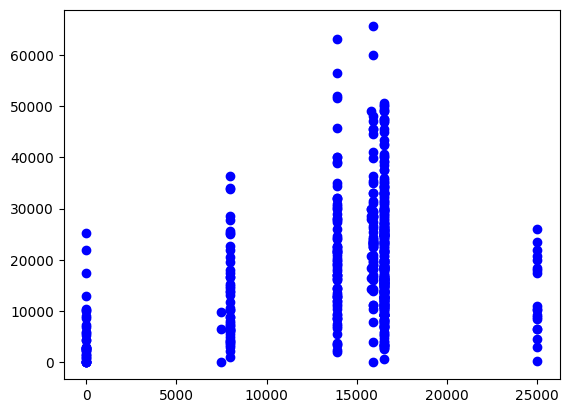

In [31]:
plt.scatter(for_a_plot, y_test, c = "blue") #k=800

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [54]:
#1
import numpy as np
import pandas as pd
#you're code as commented by me

def createData(noise,N=50):#make a function to make a data frame with three clusters that are spread out based on noise
  np.random.seed(100) # Set the seed for replicability
  X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)]) #make cluster 1 centered at 1
  X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)]) #make cluster 2 centered at 3
  X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)]) #make cluster 3 centered at 5

  gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'}) #make the first cluster into a data frame and make it group a
  gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'}) #make the second cluster into a data frame and make it group b
  gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'}) #make the third cluster into a data frame and make it group c
  df = pd.concat([gdf1,gdf2,gdf3],axis=0) #concatinate all of these data frames to one
  return df #return this data frame

df0_125 = createData(0.125) #make a dataframe with noise = 0.125
df0_25 = createData(0.25) #make a dataframe with noise = 0.25
df0_5 = createData(0.5) #make a dataframe with noise = 0.5
df1_0 = createData(1.0) #make a dataframe with noise = 1.0
df2_0 = createData(2.0) #make a dataframe with noise = 2.0

<Axes: xlabel='x1', ylabel='x2'>

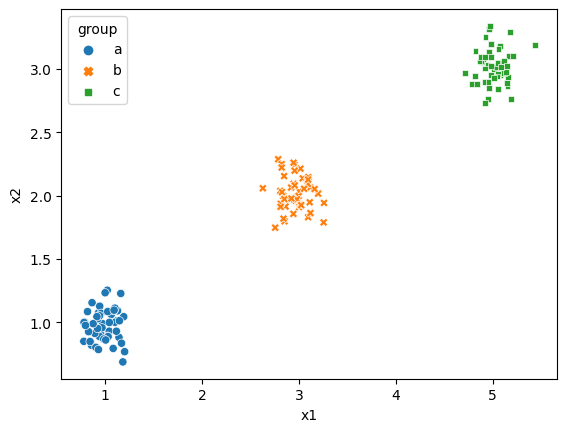

In [55]:
import seaborn as sns
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group') #plot using x1 bing the x axis, x2 being the y axis and color and shape based on the groups

<Axes: xlabel='x1', ylabel='x2'>

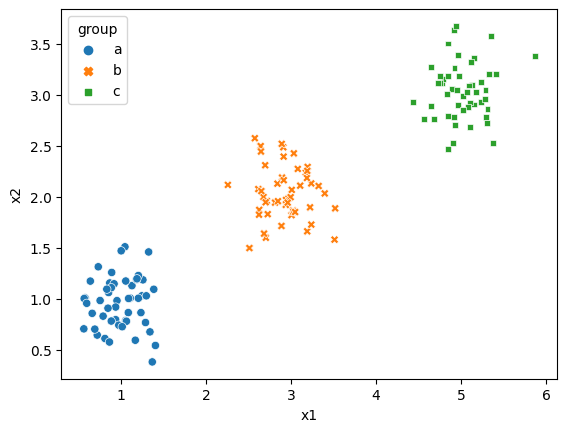

In [56]:
sns.scatterplot(data = df0_25, x='x1', y='x2',hue = 'group',style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

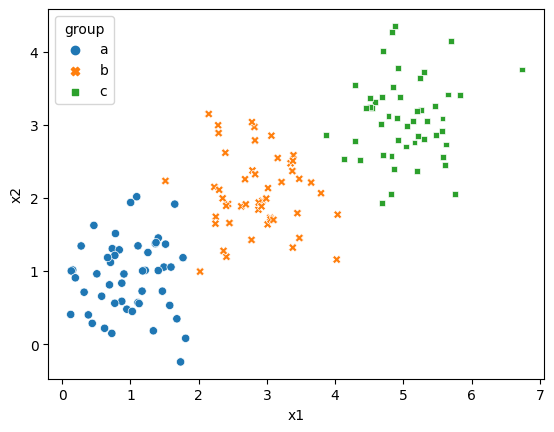

In [57]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

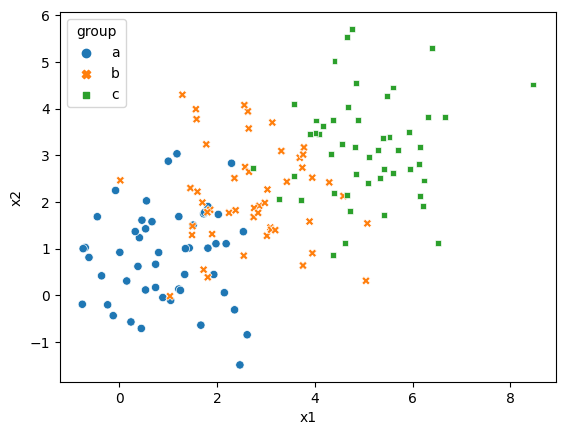

In [58]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

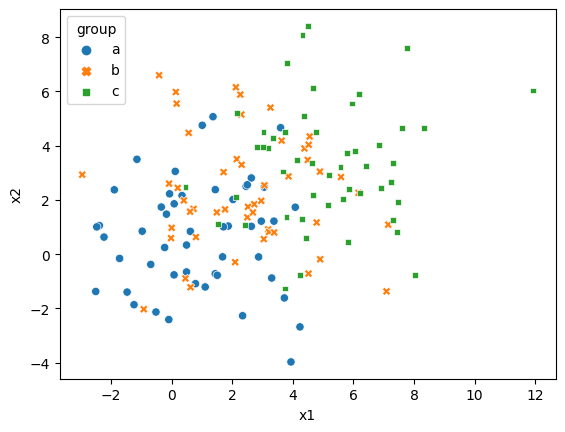

In [59]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

As the noise increases the distincness of the groups decreases significantly. As noise increases, the randomness of the data does as well. This makes the groups vary more, leading them to interesct with other groups, making them less destinct as a result. 1.0 and onwards I am unable to tell and distinct grouping.

In [64]:
#3!
#your code as commented by me
from sklearn.cluster import KMeans # Import the needed packeges
import matplotlib.pyplot as plt

def maxmin(x):  #create a maxmin function to normalize the data
  x = (x-min(x))/(max(x)-min(x))
  return x
def scree(data): # make a function to make a scree plot based on a given data frame
  X = data.loc[ : , ['x1','x2'] ] #grab the important variables
  X = X.apply(maxmin) # Normalize the important variables based on the minmax function

  #make the model
  k_bar = 15
  k_grid = np.arange(1,k_bar+1) # Go through the range of k's 1-15
  SSE = np.zeros(k_bar) # make a object to store the SSE's into as the for loop runs
  for k in range(k_bar): # Run based on k_bar
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) #make the model using KMeans from the sklearn package
    model = model.fit(X) # Fit the model based on the x1 and x2 data
    SSE[k] = model.inertia_ # Put the Sum of mean sqauared errors into the SSE object for the plot
  scree_plot, axes = plt.subplots() #set up the axes'
  sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Make the scree_plot with k_grid as the x axis and SSE as the y axis
  axes.set_ylim(0, 35) #set y limit to 35

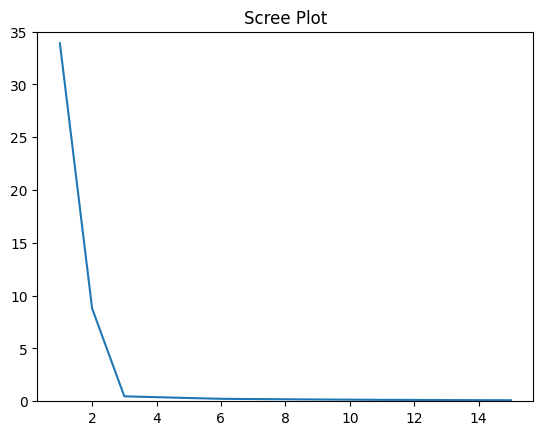

In [65]:
scree(data = df0_125)

Very harsh elbow at k=3

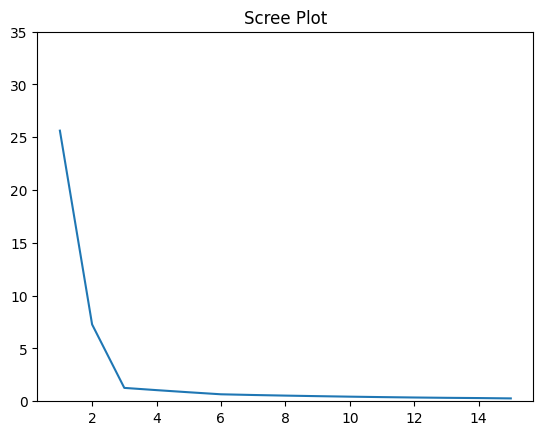

In [ ]:
scree(data = df0_25)

Decent elbow at k = 3

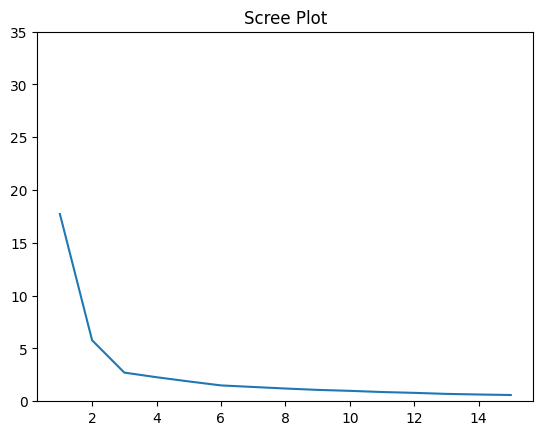

In [ ]:
scree(data = df0_5)

Ok elbow at k=3

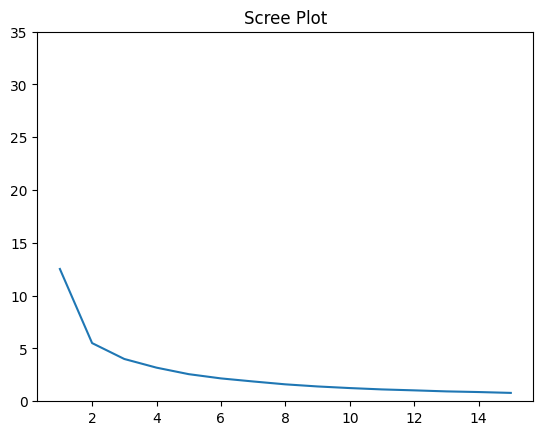

In [ ]:
scree(data = df1_0)

kinda a elbow at k = 2

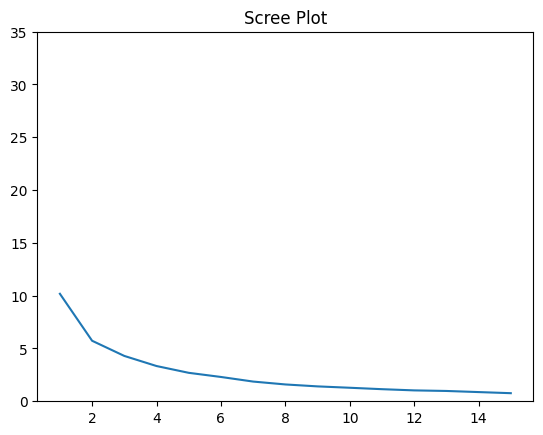

In [ ]:
scree(data = df2_0)

not much of a elbow but if I had to say a number k = 2

4.

The elbow represents where the number of clusters the program is looking for finally matches the number of clusters in the data. When they match the SSE drops significantly, as the clustering matches. However, with more and more noise the clusters become less and less distinct. The less destinct the clusters, the harder it is for the program to find the clusters. This is shown by df1_0 and df2_0, where the noise gets so large that there is not a very distinct elbow with k=2 being the best option, despite 3 clusters truely existing. The middle cluster is so combined with the other two that it is practically impossible to tell apart.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?